<a href="https://colab.research.google.com/github/gorantlasuhas/git_new/blob/main/MLlab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selected Features: ['Perimeter']
Feature: Perimeter, MI: 0.3585072377567762, Error Rate: 0.1956
  Fold 1 Error Rate: 0.1444
  Fold 2 Error Rate: 0.1778
  Fold 3 Error Rate: 0.1444
  Fold 4 Error Rate: 0.2333
  Fold 5 Error Rate: 0.2000
  Fold 6 Error Rate: 0.2444
  Fold 7 Error Rate: 0.2556
  Fold 8 Error Rate: 0.2111
  Fold 9 Error Rate: 0.1556
  Fold 10 Error Rate: 0.1889
Selected Features: ['Perimeter', 'MajorAxisLength']
Feature: MajorAxisLength, MI: 0.34834107401237, Error Rate: 0.2033
  Fold 1 Error Rate: 0.1889
  Fold 2 Error Rate: 0.2000
  Fold 3 Error Rate: 0.1444
  Fold 4 Error Rate: 0.2222
  Fold 5 Error Rate: 0.2000
  Fold 6 Error Rate: 0.2222
  Fold 7 Error Rate: 0.3444
  Fold 8 Error Rate: 0.1333
  Fold 9 Error Rate: 0.1778
  Fold 10 Error Rate: 0.2000
Selected Features: ['Perimeter', 'MajorAxisLength', 'ConvexArea']
Feature: ConvexArea, MI: 0.29766062334600907, Error Rate: 0.1900
  Fold 1 Error Rate: 0.1222
  Fold 2 Error Rate: 0.2111
  Fold 3 Error Rate: 0.1333
  Fold 4

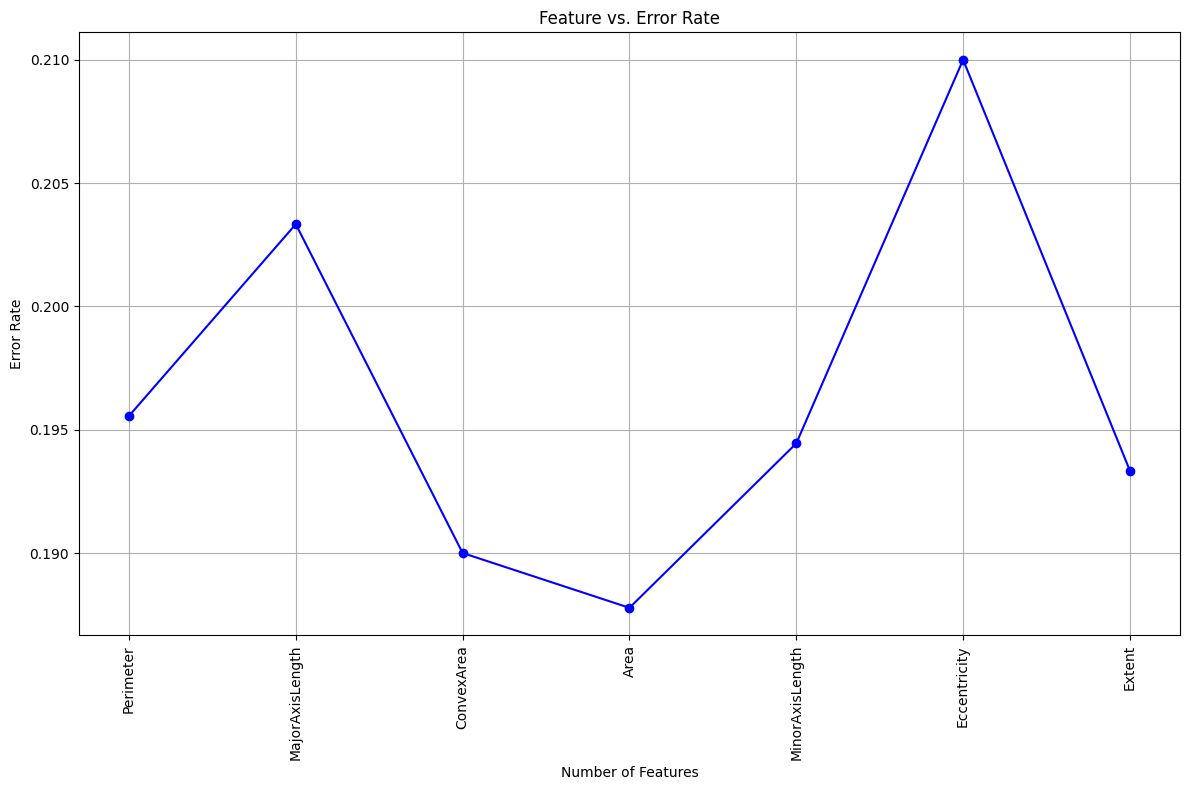

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Load the Raisin dataset in XLSX format
xlsx_file = "/content/Raisin_Dataset.xlsx"
df = pd.read_excel(xlsx_file)

# Separate features and target variable - Replace 'target_column' with the actual target column name
target_column = 'Class'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable
# Encode categorical variables (if any) using Label Encoding
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Check for missing values and impute using K-nearest neighbors
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Calculate Mutual Information for each feature
mi_values = mutual_info_classif(X_imputed, y)

# Create a DataFrame to store MI values and feature names
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi_values})

# Sort features by MI in descending order
mi_df = mi_df.sort_values(by='MI', ascending=False)

# Initialize StratifiedKFold for 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store error rates for each feature
error_rates_history = []

# Perform feature selection and build classifiers for each feature individually
for i in range(len(X.columns)):
    # Select the top i features
    selected_features = mi_df['Feature'][:i + 1].tolist()

    # Create a new DataFrame with selected features
    X_selected = X_imputed[:, [X.columns.get_loc(col) for col in selected_features]]

    # Build a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)

    # Measure error rate using 10-fold cross-validation
    error_rates = 1 - cross_val_score(clf, X_selected, y, cv=cv)
    mean_error_rate = np.mean(error_rates)

    print(f"Selected Features: {selected_features}")

    # Store error rate in history
    error_rates_history.append(mean_error_rate)

    print(f"Feature: {mi_df['Feature'].iloc[i]}, MI: {mi_df['MI'].iloc[i]}, Error Rate: {mean_error_rate:.4f}")

    for fold, error_rate in enumerate(error_rates, start=1):
        print(f"  Fold {fold} Error Rate: {error_rate:.4f}")

print('-----------------------------------------------------------------------------------------------------------')

# Plot feature vs. error rate for each feature
plt.figure(figsize=(12, 8))
plt.plot(range(len(X.columns)), error_rates_history, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Features")
plt.ylabel("Error Rate")
plt.title("Feature vs. Error Rate")
plt.xticks(range(len(X.columns)), mi_df['Feature'], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
